# Model LLM Untuk Narasi Kebijakan Sampah

Alifia Mustika Sari

## 1. Import Libraries

In [1]:
import torch
import accelerate
import os
import pandas as pd

from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    TextDataset,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments,
)
from transformers import AutoTokenizer, AutoModelForCausalLM

2025-06-09 16:42:36.900239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749487357.241261   25534 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749487357.339151   25534 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749487358.193109   25534 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749487358.193153   25534 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749487358.193156   25534 computation_placer.cc:177] computation placer alr

## 2. Setup Environment

In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 110.1 MB/s eta 0:00:00


In [4]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 48.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 41.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 31.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 34.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 61.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 65.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 48.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 36.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install "accelerate>=0.26.0"

In [15]:
print("Torch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("Accelerate Version:", accelerate.__version__)

Torch Version: 2.7.1+cu126
CUDA Available: False
Accelerate Version: 1.7.0


In [18]:
os.environ["TRANSFORMERS_CACHE"] = "./.cache/transformers"
os.environ["USE_TF"] = "0"  # Nonaktifkan TensorFlow, gunakan PyTorch

In [ ]:
base_path = '/home/jupyter'

# Cek dan ubah direktori kerja
if os.path.exists(base_path):
    os.chdir(base_path)
    print(f"✅ Berhasil berpindah ke direktori: {os.getcwd()}")
else:
    print(f"❌ Path tidak ditemukan: {target_path}")

## 3. Data Understanding

### Preview Contoh Dataset Narasi Kebijakan Harga Beras

### Preview Dataset Narasi Kebijakan Sampah

In [2]:
file_path = "/home/jupyter/data/raw/llm_texts_raw/dataset_narasi_kebijakan_sampah_fix.txt"

with open(file_path, "r", encoding="utf-8") as file:
    isi = file.read()  # Baca semua isi file jadi satu string

print(isi[:5000])

Kesimpulan: Jenis sampah yang teridentifikasi adalah kategori organik. Karakteristik utamanya adalah berbau tajam atau menyengat. Umumnya berasal dari Rumah tangga. Dampak negatif yang mungkin timbul antara lain: Mengundang lalat, kecoa, dan tikus yang menjadi vektor penyakit, Menimbulkan keluhan warga terhadap sistem pengangkutan sampah.
Rekomendasi Penanganan: Sampah dari Rumah tangga yang memiliki karakteristik berbau tajam atau menyengat sebaiknya diolah menjadi kompos yang dapat meningkatkan kesuburan tanah. Lakukan pemilahan sejak awal dan simpan dalam wadah tertutup agar proses pengomposan berjalan optimal dan mengurangi bau tidak sedap.

Kesimpulan: Jenis sampah yang teridentifikasi adalah kategori organik. Karakteristik utamanya adalah mudah membusuk. Umumnya berasal dari Restoran dan hotel. Dampak negatif yang mungkin timbul antara lain: Meningkatkan risiko kontaminasi silang dengan makanan siap saji, Memicu peningkatan emisi gas rumah kaca seperti metana (CH₄) dari tempat pe

## 4. Data Preparation

In [3]:
# Load Tokenizer dan Model GPT-2

# Load pre-trained GPT-2 dan tokenizer
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Atur token pad sebagai token akhir kalimat (eos)
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.eos_token_id

# Sesuaikan embedding model dengan jumlah token tokenizer
model.resize_token_embeddings(len(tokenizer))

# Load Dataset
# NOTE: Pastikan file hanya berisi teks kesimpulan, satu per baris
dataset = TextDataset(tokenizer=tokenizer,
                      file_path=file_path,  # Ganti sesuai path file
                      block_size=128,
)

# Buat data collator untuk language modeling (tanpa masked language modeling)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer,
                                                mlm=False  # Gunakan causal LM, bukan masked LM
)

/opt/conda/lib/python3.10/site-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


## 5. Model Development

In [4]:
# Konfigurasi training GPT-2
training_args = TrainingArguments(
    output_dir="models/llm_generator/result",   # Direktori untuk menyimpan model hasil fine-tuning
    logging_dir="models/llm_generator/logs",    # Direktori untuk menyimpan log TensorBoard
    overwrite_output_dir=True,              # Overwrite jika direktori sudah ada
    per_device_train_batch_size=2,          # Batch size per device (GPU/CPU)
    num_train_epochs=3,                     # Jumlah epoch pelatihan
    save_steps=500,                         # Simpan checkpoint setiap 500 langkah
    save_total_limit=2,                     # Maksimal 2 checkpoint disimpan
    logging_steps=100,                      # Logging setiap 100 langkah
    fp16=True,                              # Aktifkan mixed precision (jika menggunakan GPU dengan dukungan FP16)
    report_to="tensorboard"                 # Bisa juga "none" jika tidak ingin menggunakan TensorBoard
)

In [5]:
import time

start_time = time.time()

# Inisialisasi Trainer untuk fine-tuning model
trainer = Trainer(
    model=model,                   # Model GPT-2 yang akan dilatih
    args=training_args,            # Argumen pelatihan dari TrainingArguments
    data_collator=data_collator,   # Collator untuk memformat batch selama pelatihan
    train_dataset=dataset,         # Dataset yang digunakan untuk pelatihan
)

# Jalankan proses training
trainer.train()

print("Proses fine-tuning model selesai.")
print(f"Waktu eksekusi: {time.time() - start_time:.2f} detik")

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
100,2.807500
200,1.132100
300,0.854300
400,0.633200
500,0.594200
600,0.487800
700,0.423700
800,0.388300
900,0.350800
1000,0.329300


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Proses fine-tuning model selesai.
Waktu eksekusi: 3406.76 detik


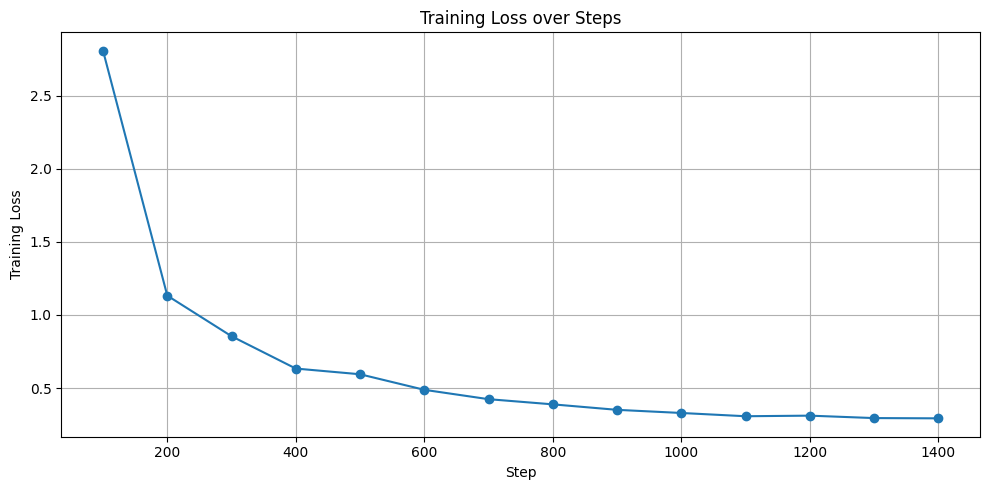

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data log dari state Trainer
log_history = trainer.state.log_history

# Konversi ke DataFrame untuk visualisasi
df_logs = pd.DataFrame(log_history)

# Filter hanya data loss (beberapa log mungkin untuk eval_loss, learning_rate, etc.)
train_loss = df_logs[df_logs['loss'].notnull()]

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss["step"], train_loss["loss"], marker='o')
plt.xlabel("Step")
plt.ylabel("Training Loss")
plt.title("Training Loss over Steps")
plt.grid(True)
plt.tight_layout()
plt.show()

### Simpan Model dan Tokenizer

In [9]:
# Simpan model dan tokenizer setelah training
trainer.save_model("models/llm_generator/gpt2-kebijakan-sampah-500-finetuned")
tokenizer.save_pretrained("models/llm_generator/gpt2-kebijakan-sampah-500-finetuned")

('models/llm_generator/gpt2-kebijakan-sampah-500-finetuned/tokenizer_config.json',
 'models/llm_generator/gpt2-kebijakan-sampah-500-finetuned/special_tokens_map.json',
 'models/llm_generator/gpt2-kebijakan-sampah-500-finetuned/vocab.json',
 'models/llm_generator/gpt2-kebijakan-sampah-500-finetuned/merges.txt',
 'models/llm_generator/gpt2-kebijakan-sampah-500-finetuned/added_tokens.json')

In [4]:
from google.cloud import storage
import os
from tqdm import tqdm

def upload_to_gcs(local_path, bucket_name, destination_folder):
    client = storage.Client()
    bucket = client.bucket(bucket_name)

    file_list = []

    if os.path.isfile(local_path):
        # File tunggal
        destination_blob_name = os.path.join(destination_folder, os.path.basename(local_path))
        file_list.append((local_path, destination_blob_name))
    
    elif os.path.isdir(local_path):
        # Semua file dalam folder (rekursif)
        for root, dirs, files in os.walk(local_path):
            for file in files:
                local_file_path = os.path.join(root, file)
                relative_path = os.path.relpath(local_file_path, local_path)
                blob_path = os.path.join(destination_folder, relative_path)
                file_list.append((local_file_path, blob_path))
    else:
        raise FileNotFoundError("Path tidak ditemukan.")

    # Upload semua file dengan satu progress bar
    with tqdm(total=len(file_list), desc="Uploading to GCS") as pbar:
        for local_file, blob_dest in file_list:
            blob = bucket.blob(blob_dest)
            blob.upload_from_filename(local_file)
            pbar.update(1)
            
upload_to_gcs(
    local_path="models/llm_generator/gpt2-kebijakan-sampah-500-finetuned",
    bucket_name="govra-bucket-organic-anorganic-b3",
    destination_folder="notebooks/models/llm_generator/gpt2-kebijakan-sampah-500-finetuned"
)

Uploading to GCS: 100%|██████████| 8/8 [00:51<00:00,  6.50s/it]


In [6]:
import shutil

folder_to_zip = "notebooks/models/llm_generator/gpt2-kebijakan-sampah-500-finetuned"
output_zip = "gpt2-kebijakan-sampah-500-finetuned.zip"

shutil.make_archive("gpt2-kebijakan-sampah-500-finetuned", 'zip', folder_to_zip)
print("📦 Folder berhasil dikompresi menjadi ZIP.")

📦 Folder berhasil dikompresi menjadi ZIP.


## 6. Testing

In [10]:
# === Konfigurasi ===
MODEL_PATH = "models/llm_generator/gpt2-kebijakan-sampah-500-finetuned"
DATA_PATH = "/home/jupyter/data/raw/llm_texts_raw/dataset_narasi_kebijakan_sampah_fix.txt"
DEVICE = "cpu"  # Ubah ke 'cuda' jika pakai GPU
MAX_SAMPLES = 10  # Batasi jumlah sampel untuk prediksi

# === Load Model dan Tokenizer ===
def load_model_and_tokenizer(model_path, device="cpu"):
    print(f"🚀 Loading model from: {model_path}\n")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path)
    model.to(device)
    print("✅ Model dan tokenizer berhasil dimuat.")
    return model, tokenizer

# === Load Kesimpulan dari File ===
def load_kesimpulan(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File tidak ditemukan: {file_path}")
    
    kesimpulan_list = []
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    
    entries = text.strip().split('\n\n')  # Asumsi dipisahkan oleh baris kosong
    for entry in entries:
        if "Kesimpulan:" in entry and "Rekomendasi Penanganan:" in entry:
            try:
                kesimpulan = entry.split("Kesimpulan:")[1].split("Rekomendasi Penanganan:")[0].strip()
                kesimpulan_list.append(kesimpulan)
            except IndexError:
                continue

    print(f"✅ Total kesimpulan yang berhasil dimuat: {len(kesimpulan_list)}\n")
    
    return kesimpulan_list

# === Generate Rekomendasi ===
def generate_rekomendasi(model, tokenizer, kesimpulan, device="cpu"):
    prompt = f"Kesimpulan: {kesimpulan}\nRekomendasi Penanganan:"
    inputs = tokenizer.encode_plus(prompt,
                                   return_tensors="pt",
                                   padding=True,
                                   truncation=True)
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    output = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_new_tokens=100,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id
    )

    decoded = tokenizer.decode(output[0], skip_special_tokens=True)
    rekomendasi = decoded.replace(prompt, "").strip()
    return rekomendasi

# === Main ===
def main():
    model, tokenizer = load_model_and_tokenizer(MODEL_PATH, DEVICE)
    kesimpulan_list = load_kesimpulan(DATA_PATH)

    for i, kesimpulan in enumerate(kesimpulan_list[:MAX_SAMPLES]):
        rekomendasi = generate_rekomendasi(model, tokenizer, kesimpulan, DEVICE)
        print(f"🟦 KESIMPULAN ({i+1}):\n{kesimpulan}")
        print(f"🟩 REKOMENDASI:\n{rekomendasi}")
        print("=" * 100)

if __name__ == "__main__":
    main()

🚀 Loading model from: models/llm_generator/gpt2-kebijakan-sampah-500-finetuned

✅ Model dan tokenizer berhasil dimuat.
✅ Total kesimpulan yang berhasil dimuat: 498

🟦 KESIMPULAN (1):
Jenis sampah yang teridentifikasi adalah kategori organik. Karakteristik utamanya adalah berbau tajam atau menyengat. Umumnya berasal dari Rumah tangga. Dampak negatif yang mungkin timbul antara lain: Mengundang lalat, kecoa, dan tikus yang menjadi vektor penyakit, Menimbulkan keluhan warga terhadap sistem pengangkutan sampah.
🟩 REKOMENDASI:
Sampah dari Rumah tangga yang memiliki karakteristik mudah membusuk sebaiknya diolah menjadi kompos yang dapat meningkatkan kesuburan tanah. Lakukan pemilahan sejak awal dan simpan dalam wadah tertutup agar proses pengomposan berjalan optimal dan mengurangi bau tidak sedap
🟦 KESIMPULAN (2):
Jenis sampah yang teridentifikasi adalah kategori organik. Karakteristik utamanya adalah mudah membusuk. Umumnya berasal dari Restoran dan hotel. Dampak negatif yang mungkin timbul 